### Pandas Lab -- Basic Selecting & Querying

This lab walks you through various sections of Pandas syntax for grabbing & selecting data.

The lab is broken down into three parts, and will be completed throughout class.

 - 1. Basic selectors with Pandas
 - 2. Selecting based on conditions & boolean indexes
 - 3. Special commands for selecting certain types of rows

### Section 1:  Selecting Data With Pandas

In [4]:
import pandas as pd
df = pd.read_csv('../../data/titanic.csv')

**1). What is the average age of all passengers on board?**

In [5]:
avg_age = df['Age'].mean()
avg_age

29.69911764705882

**2). What are the median values of the Fare & SibSp columns?**

In [6]:
df[['Fare', 'SibSp']].median()

Fare     14.4542
SibSp     0.0000
dtype: float64

**3). What was the maximum fare paid among the first 100 passengers on board? (This would be the first 100 rows)**

In [7]:
df[:100]['Fare'].max()

263.0

**4). What is the modal value of the last 4 columns in the dataset?**

In [8]:
df.loc[:, df.columns[-4:]].mode()

,Ticket,Fare,Cabin,Embarked
0,1601,8.05,B96 B98,S
1,347082,NaN,C23 C25 C27,NaN
2,CA. 2343,NaN,G6,NaN


In [9]:
#?df.mode

**5). What is the mean value of the first 250 rows of the first 3 columns in the dataset?**

In [10]:
df.iloc[:250, :3].mean()

PassengerId    125.500
Survived         0.344
Pclass           2.416
dtype: float64

### Section II: Selecting Based on Conditions

**1). How many females were on board the titanic? Men?**

In [11]:
import numpy as np
females = np.sum(df['Sex'] == 'female')
males = np.sum(df['Sex'] == 'male')
females, males, df.shape[0], males + females

(314, 577, 891, 891)

**2). What was the survival rate for females on the titanic? Men?**

In [12]:
male_survival = np.sum(df[df['Sex'].isin(['male'])]['Survived']) / males
female_survival = np.sum(df[df['Sex'].isin(['female'])]['Survived']) / females
female_survival, male_survival

(0.7420382165605095, 0.18890814558058924)

**3). What was the survival rate for people in either passenger class 1 or 2?**

In [13]:
np.sum(df[df['Pclass'].isin([1, 2])]['Survived']) / np.sum(df['Pclass'].isin([1, 2]))

0.5575

**4). Were woman more likely to survive if they were traveling without siblings?**

In [14]:
df[(df['Sex'] == 'female') & (df['SibSp'] == 0)]['Survived'].mean() - df[(df['Sex'] == 'female') & (df['SibSp'] != 0)]['Survived'].mean()

0.10164203612479472

**Section III: Special Types of Selectors**

To get some additional practice using common Pandas methods, we'll go over some common scenarios you typically have to select data for. 

*The methods used in this section have not been covered in class.*  Each question will come with the recommended method to use.  It's best to use the `?` before the method to read how it works and figure out how to use it.  

It's designed to be a little bit of a treasure hunt to familiarize yourself with a lot of the bread & butter pandas methods.

**1). Can you return the amount of null values for each column?**

To use: `df.isnull()`.  **Hint:** `True` sums to 1, `False` to 0.

In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**2). Can you find the count values for every single unique value within a column?**

To use: `pd.Series.value_counts()`.  **Hint:** This is a *Series* method, not a *Dataframe* method.  

In [16]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

**3). Can you find the column with the highest number of unique values?**

To use: `pd.Series.nunique`, and `df.sort_values()` if you want to sort it.

In [17]:
for i in df.columns:
    print('Col:', i, '=>', df[i].nunique())

Col: PassengerId => 891
Col: Survived => 2
Col: Pclass => 3
Col: Name => 891
Col: Sex => 2
Col: Age => 88
Col: SibSp => 7
Col: Parch => 7
Col: Ticket => 681
Col: Fare => 248
Col: Cabin => 147
Col: Embarked => 3


In [18]:
df.nunique().sort_values(ascending=False)

Name           891
PassengerId    891
Ticket         681
Fare           248
Cabin          147
Age             88
Parch            7
SibSp            7
Embarked         3
Pclass           3
Sex              2
Survived         2
dtype: int64

**4). Can you query your dataframe so that it only returns columns that have empty values?**

To use: `df.isnull()`, `df.loc`

In [19]:
np.sum(df.isnull())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [51]:
df.loc[:, np.sum(df.isnull()) > 0]

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S
...,...,...,...
886,27.0,NaN,S
887,19.0,B42,S
888,NaN,NaN,S
889,26.0,C148,C


**5).  Can you query the dataframe such that it only returns rows that have *no* missing values, in any of their columns?**

To use: `df.isnull()`, `df.any()`, or, conversely, `df.notnull()`, and `df.all()`

**Hint:** The `~` operator, if put in front of a query, selects for values that are **not** True.

In [21]:
df.all(axis=1)

df[df.notnull().all(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [22]:
df.dropna(axis=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [23]:
df[~df.isna().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


**6).  Can you sort passengers according to how much they paid for a ticket?**

To use: `df.sort_values()`

In [27]:
df.sort_values('Fare', ascending=False)[['Name', 'Fare', 'Ticket']]

,Name,Fare,Ticket
258,"Ward, Miss. Anna",512.3292,PC 17755
737,"Lesurer, Mr. Gustave J",512.3292,PC 17755
679,"Cardeza, Mr. Thomas Drake Martinez",512.3292,PC 17755
88,"Fortune, Miss. Mabel Helen",263.0000,19950
27,"Fortune, Mr. Charles Alexander",263.0000,19950
...,...,...,...
633,"Parr, Mr. William Henry Marsh",0.0000,112052
413,"Cunningham, Mr. Alfred Fleming",0.0000,239853
822,"Reuchlin, Jonkheer. John George",0.0000,19972
732,"Knight, Mr. Robert J",0.0000,239855


**7). Can you sort passengers according to how much they paid for a ticket, within each port of embarkment?**  

ie, sort the rows so that the passengers who embarked from port `C` are listed first, and then within port `C` everyone is sorted by how much they paid for a ticket.

To use: `df.sort_values()`

In [52]:
df.sort_values(['Embarked', 'Fare'], ascending=[True, False])[['Name', 'Fare', 'Embarked']]

,Name,Fare,Embarked
258,"Ward, Miss. Anna",512.3292,C
679,"Cardeza, Mr. Thomas Drake Martinez",512.3292,C
737,"Lesurer, Mr. Gustave J",512.3292,C
311,"Ryerson, Miss. Emily Borie",262.3750,C
742,"Ryerson, Miss. Susan Parker ""Suzette""",262.3750,C
...,...,...,...
806,"Andrews, Mr. Thomas Jr",0.0000,S
815,"Fry, Mr. Richard",0.0000,S
822,"Reuchlin, Jonkheer. John George",0.0000,S
61,"Icard, Miss. Amelie",80.0000,NaN


**8). If people traveled in a group they had the same ticket number.  Can you query your dataframe to return the tickets values that occurred more than once?  Ie, run a line in pandas that returns *a list* of ticket values that occurred more than once, not an entire dataframe.**

To use: there are a few methods you can use, but try `df.duplicated()`, along with `df.unique()`.  **Hint:** You can test for duplicated values on specific columns.

In [54]:
mask = df['Ticket'].value_counts() > 1
unique_ticket_list = (mask)[(mask)].index.values.tolist() #.apply(lambda x: x.index if x else ) #['Ticket'].unique()
len(unique_ticket_list), unique_ticket_list[:5]

(134, ['1601', 'CA. 2343', '347082', '347088', 'CA 2144'])

In [73]:
q = df.duplicated(subset='Ticket',)
df[q]['Ticket'].unique().tolist()

['349909',
 'CA 2144',
 '19950',
 '11668',
 '347082',
 'S.O.C. 14879',
 '237736',
 '35281',
 '2651',
 '113803',
 'W./C. 6608',
 '3101295',
 '347088',
 '1601',
 '382652',
 '347742',
 'CA. 2343',
 '347077',
 '230080',
 'PC 17569',
 '3101278',
 '4133',
 '36973',
 '2665',
 '347054',
 'LINE',
 'PC 17558',
 '113781',
 '244367',
 '248738',
 'PC 17760',
 '363291',
 '367226',
 'PC 17582',
 '345764',
 '113776',
 '16966',
 '349237',
 '113505',
 '370365',
 'PC 17604',
 '113789',
 '35273',
 'PP 9549',
 'STON/O2. 3101279',
 '19928',
 '239853',
 '370129',
 '113760',
 '29106',
 'F.C.C. 13529',
 '250644',
 'C.A. 34651',
 '2666',
 '110465',
 '11967',
 '19943',
 'C.A. 37671',
 '2627',
 '110152',
 'PC 17758',
 '371110',
 '111361',
 '26360',
 '2668',
 'PC 17761',
 '2908',
 'C.A. 33112',
 '17421',
 'PC 17757',
 '110413',
 '13507',
 '28403',
 '36947',
 '345773',
 'PC 17485',
 '243847',
 'SC/Paris 2123',
 '367230',
 '347080',
 'A/5. 3336',
 '230136',
 '2653',
 '13502',
 'C.A. 31921',
 '376564',
 'PC 17477',
 

**9). See if you can query a dataframe so that it only returns rows with passengers that are traveling in groups, based on their ticket numbers.**

To use: `df.isin()`, assuming you used the approach suggested in the previous question.

In [30]:
grps = df[df['Ticket'].isin((df['Ticket'].value_counts() > 1)[(df['Ticket'].value_counts() > 1)].index.values)]
grps.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


In [74]:
grps2 = df[df['Ticket'].isin(unique_ticket_list)]
grps2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


To use: `df.select_dtypes()`, and (optionally) the `columns` attribute.  **Note:** `columns` is NOT a method!

In [76]:
df.select_dtypes('object').columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

**11).  Can you only select columns that are numeric?**

To use: `df.select_dtypes()`.  This question is very similar to the one above it, just for a different data type.

In [81]:
num_cols = df.select_dtypes(np.number).columns.tolist()
num_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

**12). Can you fill in the missing values of your numeric columns with their average value?**

To use: `df.fillna()`, to be used in conjunction with the suggested methods from question 11.

In [50]:
df[(df[num_cols].fillna(df[num_cols].mean()) == df[num_cols].mean()).any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [86]:
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.mean())) 

In [87]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [110]:
import numpy as np
aat = df[num_cols] @ df[num_cols].T
eigvals, eigvs = np.linalg.eig(aat)

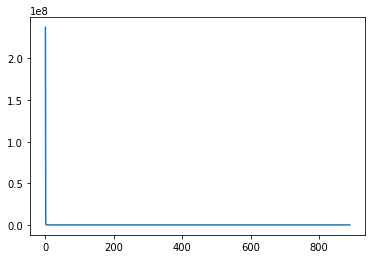

In [123]:
import matplotlib.pyplot as plt
plt.plot(eigvals);

In [120]:
np.diag(eigvals).shape

(891, 891)

In [121]:
aat.shape

(891, 891)

In [122]:
eigvals.shape

(891,)